<a href="https://colab.research.google.com/github/c0037654Newcastle/CSC2034-DS-Project/blob/main/CSC2034_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC2034 - Data Science Project

##Google Colab Setup

In [158]:
!git clone https://github.com/c0037654Newcastle/CSC2034-DS-Project.git

Cloning into 'CSC2034-DS-Project'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 61 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), 1.18 MiB | 1.71 MiB/s, done.


In [159]:
import os
os.chdir('CSC2034-DS-Project')

##Importing the datasets
Importing the datasets for both varieties (red and white) of Portuguese Vinho Verde.

In [160]:
import pandas as pd

white_path = './data/winequality-white.csv'
red_path = './data/winequality-red.csv'

white_vihno_dataset = pd.read_csv(white_path, header = 0, sep=';')
red_vihno_dataset = pd.read_csv(red_path, header = 0, sep=';')

##Exploratory data analysis (EDA)

###1) A
*   Describe the distribution of wine quality across all samples, separately for red and white.
*   Compare the quality distributions between reds and whites.
*   Create suitable plots to illustrate


**Distribution of the quality of the white vinho verde in the dataset**

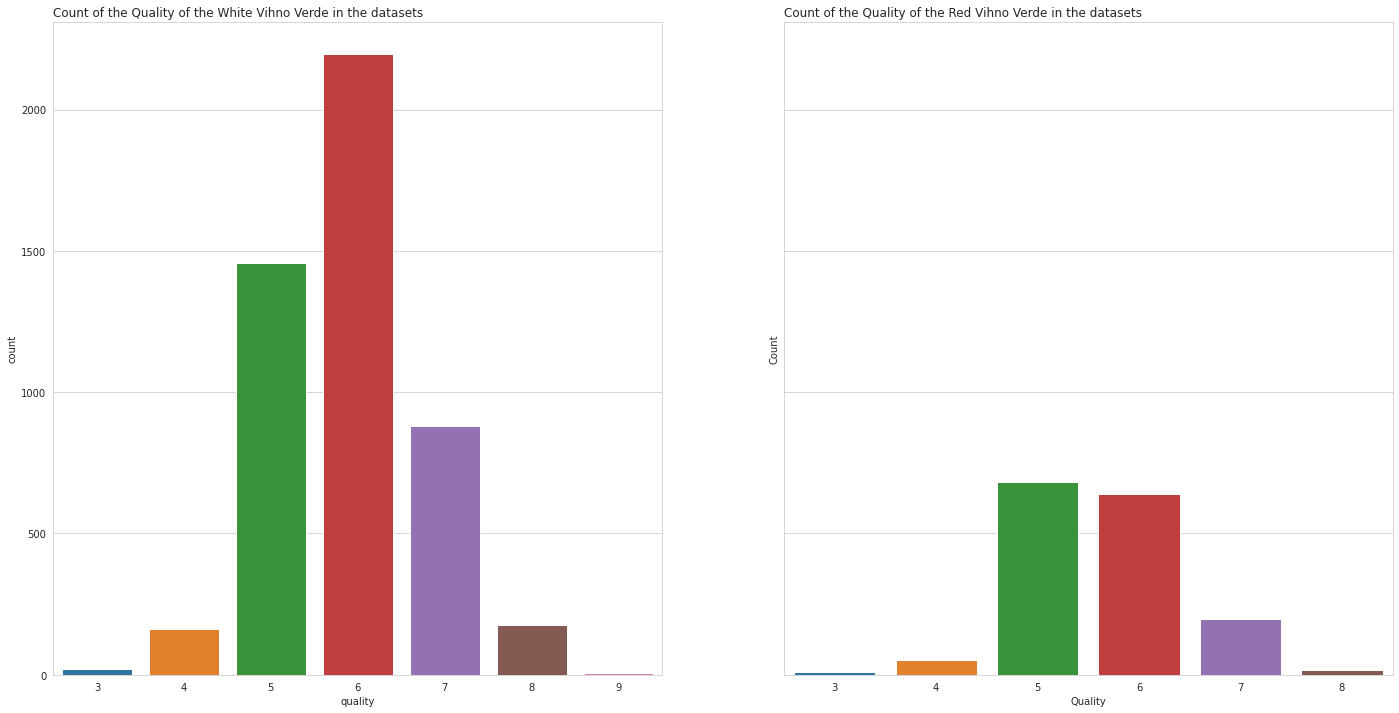

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharey=True)

ax1.set_title("Count of the Quality of the White Vihno Verde in the datasets", loc='left')
ax2.set_title("Count of the Quality of the Red Vihno Verde in the datasets", loc='left')

sns.countplot(x = "quality", data = white_vihno_dataset, ax=ax1)
sns.countplot(x = "quality", data = red_vihno_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

In [162]:
import statistics

print("White Vihno Verde - Mean:", statistics.mean(white_vihno_dataset['quality']))
print("White Vihno Verde - Median:", statistics.median(white_vihno_dataset['quality']))
print("White Vihno Verde - Mode:", statistics.mode(white_vihno_dataset['quality']))
print("White Vihno Verde - Standard Deviation:", statistics.stdev(white_vihno_dataset['quality']))

White Vihno Verde - Mean: 5.87790935075541
White Vihno Verde - Median: 6.0
White Vihno Verde - Mode: 6
White Vihno Verde - Standard Deviation: 0.8856385749678312


Based on these statistics, the distribution of White Vinho Verde quality is somewhat bell-shaped and centered around the mean and median values of 5.88 and 6.0, respectively. The fact that the mode value is also 6 suggests that this is a common quality score for this type of wine. The standard deviation of 0.89 indicates that the quality scores are somewhat spread out around the mean, with some variability in the data

In [163]:
print("Red Vihno Verde - Mean:", statistics.mean(red_vihno_dataset['quality']))
print("Red Vihno Verde - Median:", statistics.median(red_vihno_dataset['quality']))
print("Red Vihno Verde - Mode:", statistics.mode(red_vihno_dataset['quality']))
print("Red Vihno Verde - Standard Deviation:", statistics.stdev(red_vihno_dataset['quality']))

Red Vihno Verde - Mean: 5.6360225140712945
Red Vihno Verde - Median: 6
Red Vihno Verde - Mode: 5
Red Vihno Verde - Standard Deviation: 0.8075694397347049


Based on these statistics, the distribution of Red Vinho Verde quality is also somewhat bell-shaped and centered around the mean and median values of 5.64 and 6.0, respectively. The mode value of 5 suggests that this is a relatively common quality score for this type of wine. The standard deviation of 0.81 indicates that the quality scores are somewhat less variable than in the White Vinho Verde data.

Overall, both red and white Vinho Verde wines appear to have similar distributions of quality scores, with similar median and mode values, and somewhat similar ranges of quality scores. However, the white Vinho Verde data has a slightly higher mean and standard deviation, indicating slightly higher overall quality and more variability in quality scores compared to the red Vinho Verde data.

###1) B
*   Discretise the alcohol content variables into low, mid, high based on its distribution.
*   Create a 3-valued "alcohol_cat" variable to represent this.

Finding the average and standard deviation of the red and white vinho verde datasets

In [164]:
import numpy as np

white_average = np.mean(white_vihno_dataset['alcohol'])
white_stddev = np.std(white_vihno_dataset['alcohol'])
red_average = np.mean(red_vihno_dataset['alcohol'])
red_stddev = np.std(red_vihno_dataset['alcohol'])

print('White Vihno Verde Alcohol Average',white_average)
print('White Vihno Verde Alcohol Standard Deviation',white_stddev)
print('Red Vihno Verde Alcohol Average',red_average)
print('Red Vihno Verde Alcohol Standard Deviation',red_stddev)

White Vihno Verde Alcohol Average 10.514267047774602
White Vihno Verde Alcohol Standard Deviation 1.2304949365418656
Red Vihno Verde Alcohol Average 10.422983114446529
Red Vihno Verde Alcohol Standard Deviation 1.0653343003437483


Defining the alcohol categories for the reader

In [165]:
print('White Alcohol level is less than',white_average - white_stddev, 'wine will be in the low category')
print('White Alcohol level is greater than',white_average - white_stddev, 'but less than', white_average + white_stddev, 'wine will be in the mid category')
print('White Alcohol level is greater than',white_average + white_stddev, 'wine will be in the hight category')

print()

print('Red Alcohol level is less than',red_average - red_stddev, 'wine will be in the low category')
print('Red Alcohol level is greater than',red_average - red_stddev, 'but less than', red_average + red_stddev, 'wine will be in the mid category')
print('Red Alcohol level is greater than',red_average + red_stddev, 'wine will be in the hight category')

White Alcohol level is less than 9.283772111232736 wine will be in the low category
White Alcohol level is greater than 9.283772111232736 but less than 11.744761984316469 wine will be in the mid category
White Alcohol level is greater than 11.744761984316469 wine will be in the hight category

Red Alcohol level is less than 9.357648814102781 wine will be in the low category
Red Alcohol level is greater than 9.357648814102781 but less than 11.488317414790277 wine will be in the mid category
Red Alcohol level is greater than 11.488317414790277 wine will be in the hight category


Function for categorising the alcohol level into low, mid and high based on the average and standard deviation 

In [166]:
def alcohol_category(alcohol_level, average, stddev):
  if alcohol_level < (average-stddev):
    return 'low'
  elif alcohol_level < (average + stddev):
    return 'mid'
  else:
    return 'high'

Apply the alcohol category function to red and white vihno verde datasets to create alcohol_cat column, and shows the first 5 entries of the updated dataset


In [167]:
white_vihno_dataset['alcohol_cat'] = white_vihno_dataset['alcohol'].apply(alcohol_category, args=(white_average, white_stddev,))
red_vihno_dataset['alcohol_cat'] = red_vihno_dataset['alcohol'].apply(alcohol_category, args=(red_average, red_stddev,))

print(f"List of features:\n\t{white_vihno_dataset.columns}")

print(f"\nExamining the dataset:")
display(white_vihno_dataset)

List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat'],
      dtype='object')

Examining the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,mid
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,mid
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,mid
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


###1) C
*   Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content.
*   Create suitable plots to illustrate.
*    Can you draw any conclusions on the relationship between alcohol content and quality?



Histogram to show the cumulative value for each alcohol_cat in the White Vihno Verde dataset

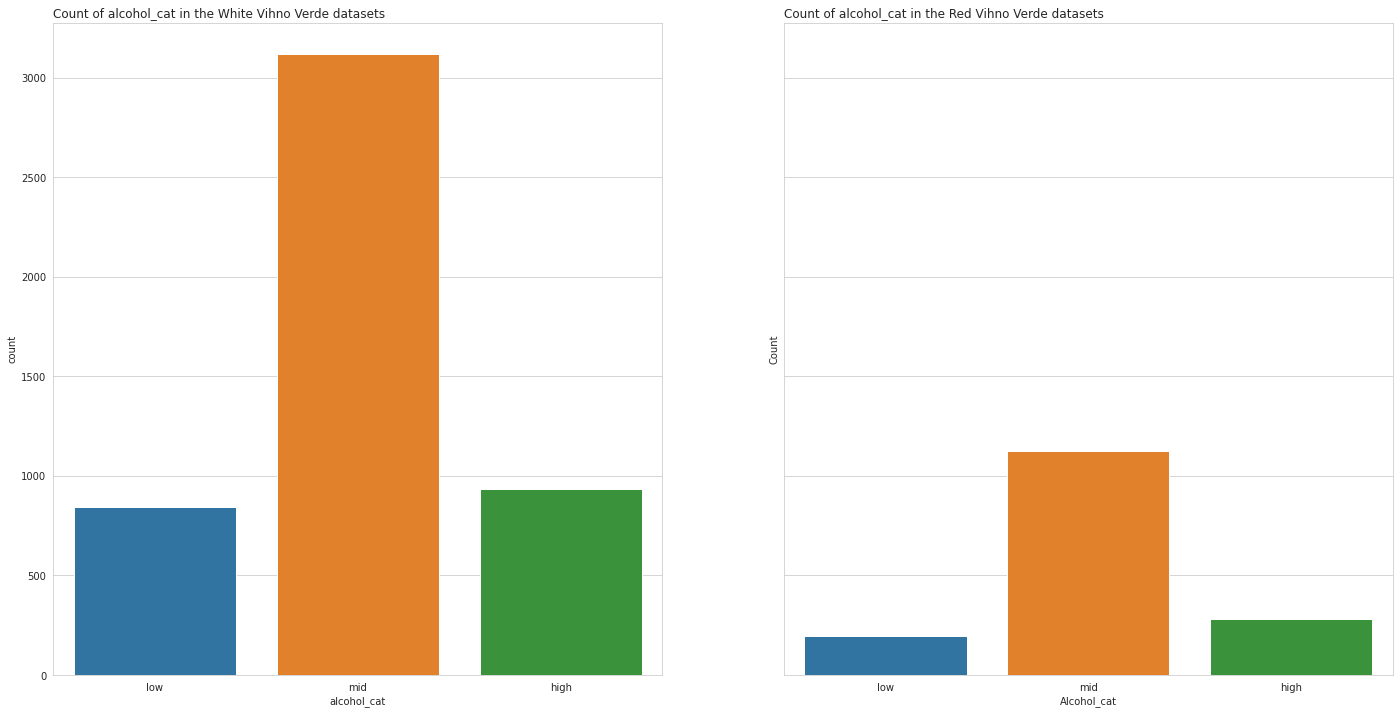

In [168]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharex=True, sharey=True)

ax1.set_title("Count of alcohol_cat in the White Vihno Verde datasets", loc='left')
ax2.set_title("Count of alcohol_cat in the Red Vihno Verde datasets", loc='left')

sns.countplot(data=white_vihno_dataset, x="alcohol_cat", ax=ax1, order=['low', 'mid', 'high'])
sns.countplot(data=red_vihno_dataset, x="alcohol_cat", ax=ax2, order=['low', 'mid', 'high'])

plt.xlabel("Alcohol_cat")
plt.ylabel("Count")
plt.show()
plt.close()

Histogram to shows the number of wines at each alcohol_cat rated a certain quality. The y axis had to be log scaled to make sure each bar was shown.

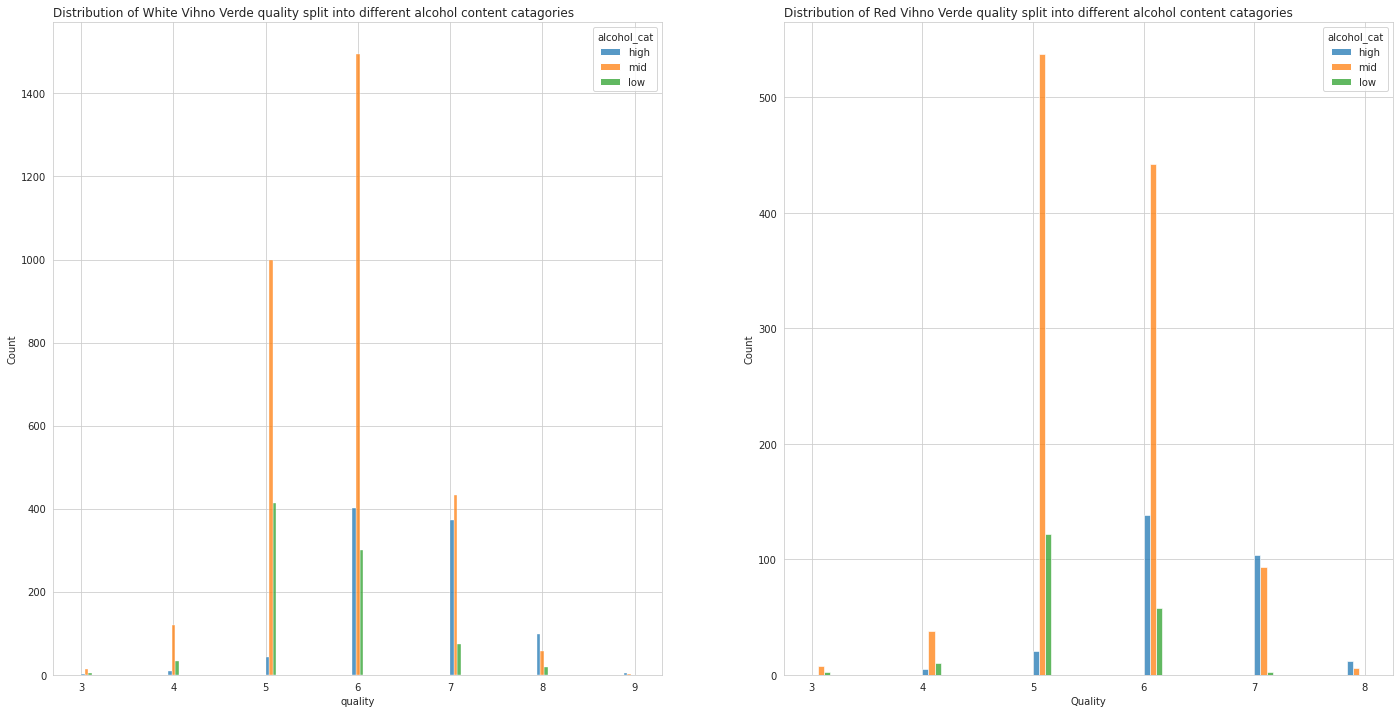

In [169]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Distribution of White Vihno Verde quality split into different alcohol content catagories", loc='left')
ax2.set_title("Distribution of Red Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.histplot(data=white_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax1, hue_order=['high', 'mid', 'low'])
sns.histplot(data=red_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax2, hue_order=['high', 'mid', 'low'])

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

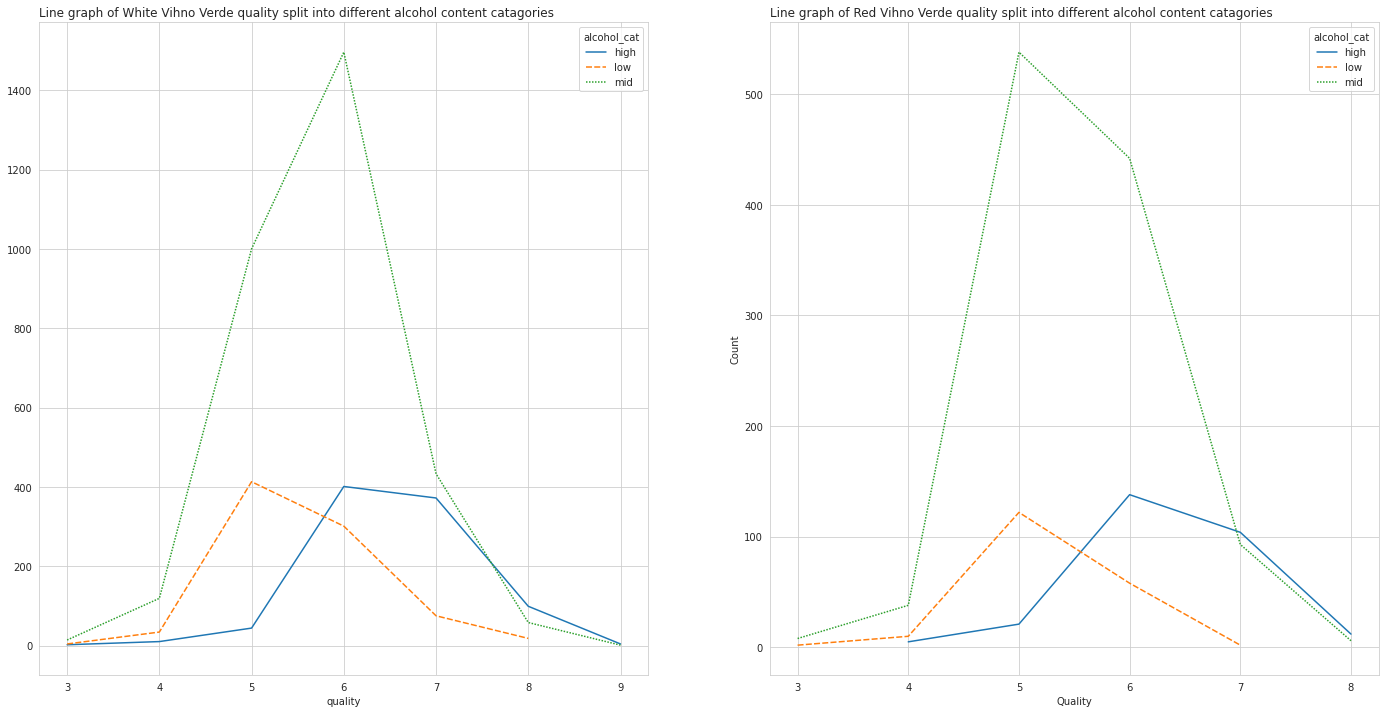

In [170]:
white_sub_dataset = white_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')
red_sub_dataset = red_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Line graph of White Vihno Verde quality split into different alcohol content catagories", loc='left')
ax2.set_title("Line graph of Red Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.lineplot(data=white_sub_dataset, ax=ax1)
sns.lineplot(data=red_sub_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

It is easiest to see in the line graph, the high alcohol blue line is the identical shape to the low alcohol orange line. However, the blue line is shifted 1 greater quailty rating then the orange line. This concludes that there is a correlation between higher alcohol and higher quality.

### 1) D


*   Plot the residual sugar variable and identify a suitable threshold (such that each class has approximately the same number of records) to separate "sweet" from "dry" wines
*   Create a new "isSweet" binary variable to represent these two classes




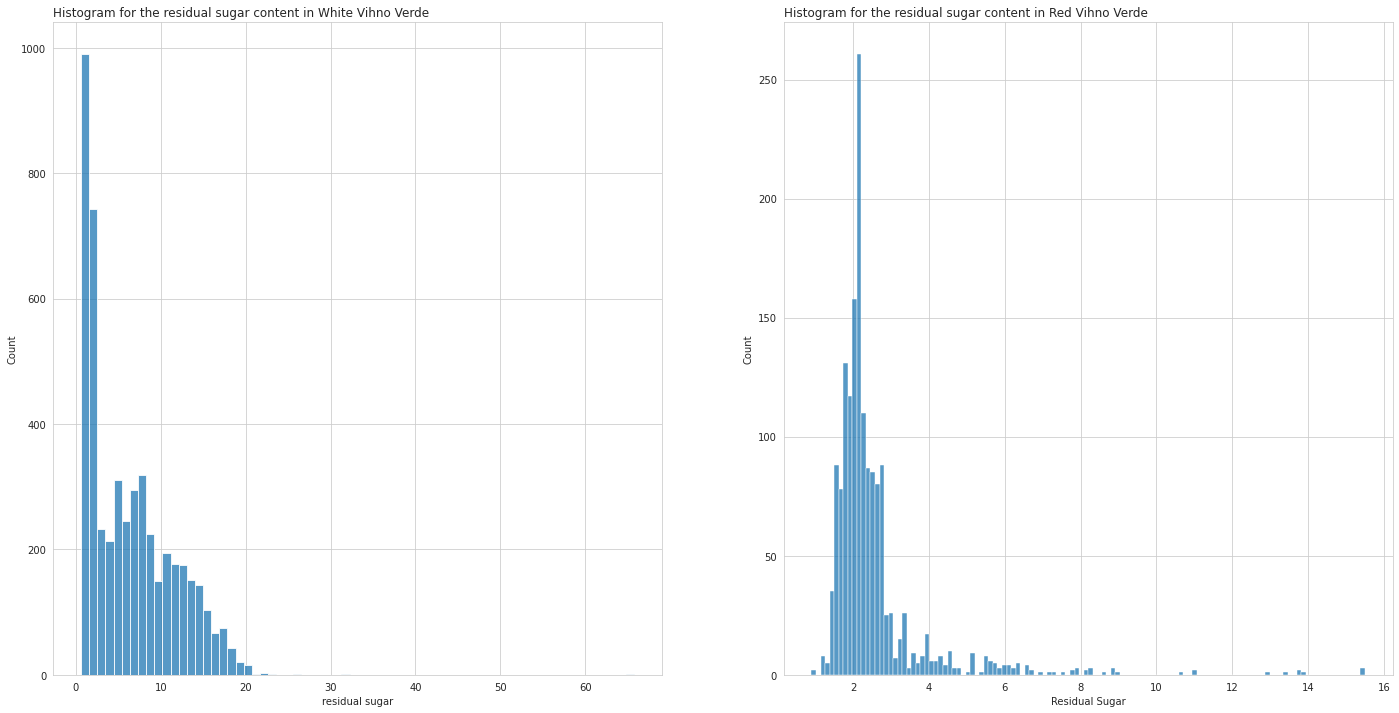

In [171]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Histogram for the residual sugar content in White Vihno Verde", loc='left')
ax2.set_title("Histogram for the residual sugar content in Red Vihno Verde", loc='left')


sns.histplot(data=white_vihno_dataset, x="residual sugar", ax=ax1)
sns.histplot(data=red_vihno_dataset, x="residual sugar", ax=ax2)


plt.xlabel("Residual Sugar")
plt.show()
plt.close()

*   White Vihno Verde with above 5.25g/L of residual sugar is considered sweet

*   Red Vihno Verde with above 2.2g/L of residual sugar is considered sweet

In [172]:
def sweetness(sweet_level, boundary):
  if sweet_level < boundary:
    return 'dry'
  else:
    return 'sweet'

In [173]:
white_vihno_dataset['isSweet'] = white_vihno_dataset['residual sugar'].apply(sweetness, args=(5.25,))
red_vihno_dataset['isSweet'] = red_vihno_dataset['residual sugar'].apply(sweetness, args=(2.2,))

print(f"\nExamining the dataset:")
display(white_vihno_dataset)


Examining the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,mid,dry
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,mid,sweet
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid,sweet
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid,sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,mid,dry
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,mid,sweet
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,mid,dry
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry


Used a bar graph to show the summation of the dry and sweet catagorised wines for both the white a red vihno verde datasets

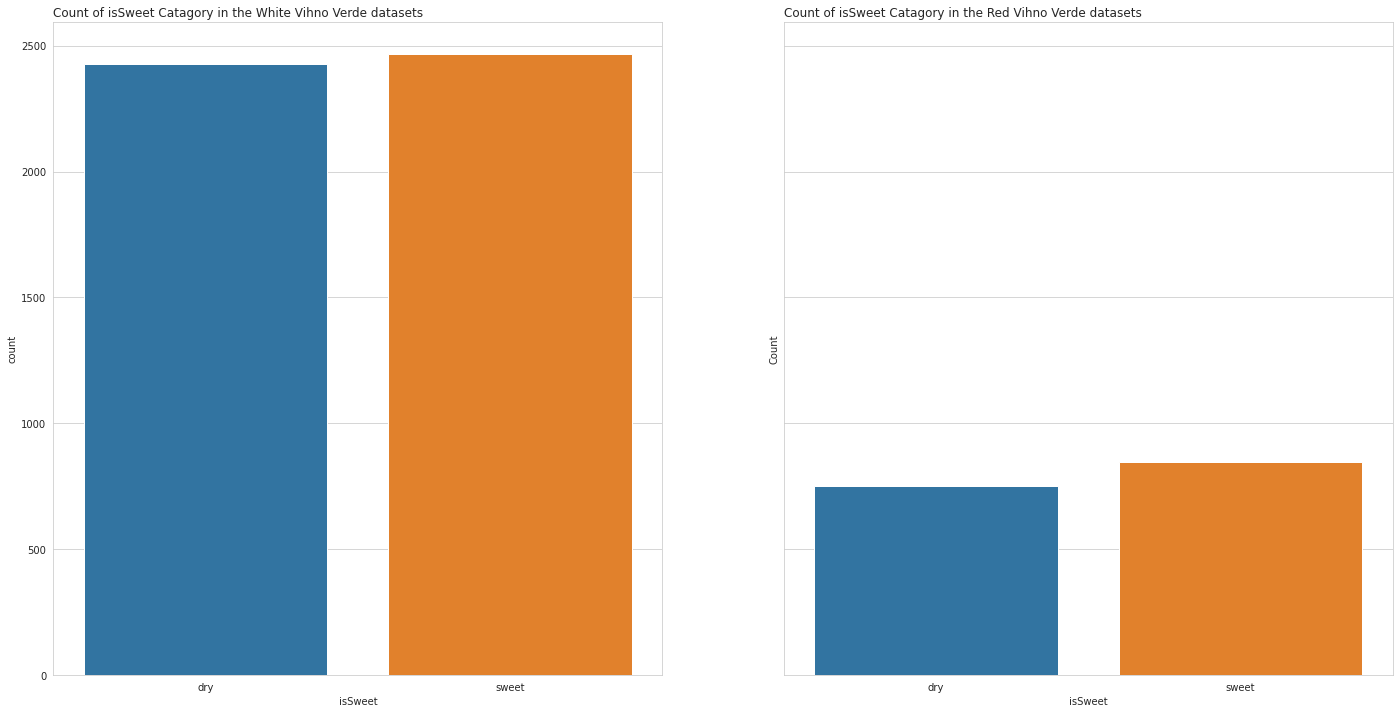

In [174]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharex=True, sharey=True)

ax1.set_title("Count of isSweet Catagory in the White Vihno Verde datasets", loc='left')
ax2.set_title("Count of isSweet Catagory in the Red Vihno Verde datasets", loc='left')

sns.countplot(data=white_vihno_dataset, x="isSweet", ax=ax1)
sns.countplot(data=red_vihno_dataset, x="isSweet", ax=ax2)

plt.xlabel("isSweet")
plt.ylabel("Count")
plt.show()
plt.close()

Used a scatter graph to show that the dry to sweet distribution is similar 

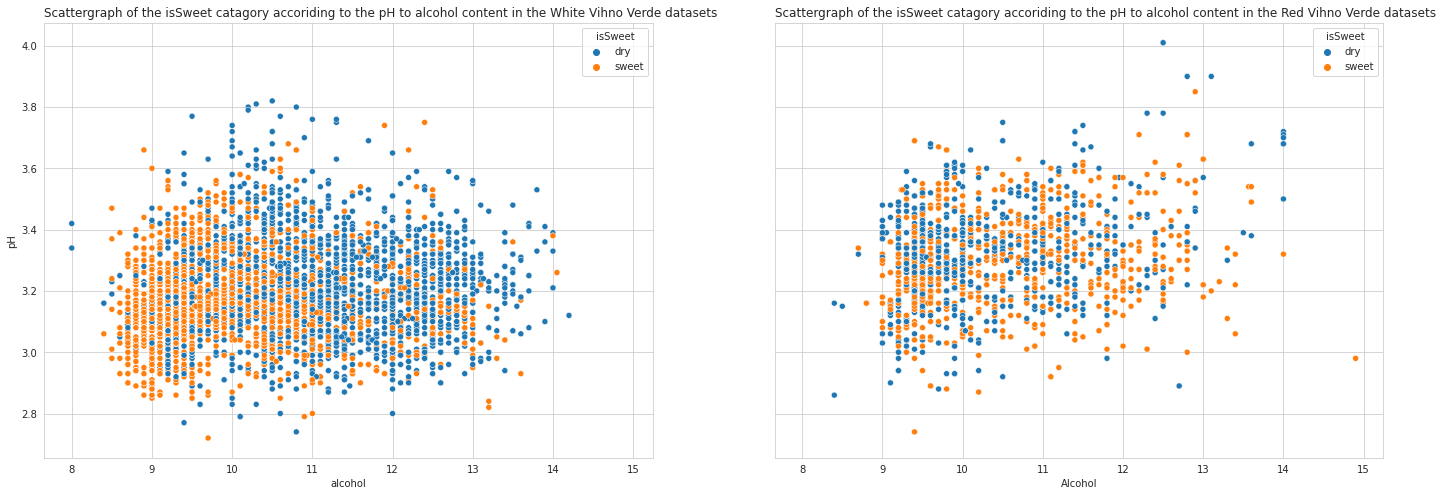

In [175]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2, sharex=True, sharey=True)

ax1.set_title("Scattergraph of the isSweet catagory accoriding to the pH to alcohol content in the White Vihno Verde datasets", loc='left')
ax2.set_title("Scattergraph of the isSweet catagory accoriding to the pH to alcohol content in the Red Vihno Verde datasets", loc='left')

sns.scatterplot(data=white_vihno_dataset, x='alcohol', y='pH', hue='isSweet', ax=ax1, hue_order=['dry', 'sweet'])
sns.scatterplot(data=red_vihno_dataset, x='alcohol', y='pH', hue='isSweet', ax=ax2, hue_order=['dry', 'sweet'])

plt.xlabel("Alcohol")
plt.ylabel("pH")
plt.show()
plt.close()

### 1) E


*   Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet.
*    Are sweet wines perceived as lower or higher quality than dry wines?



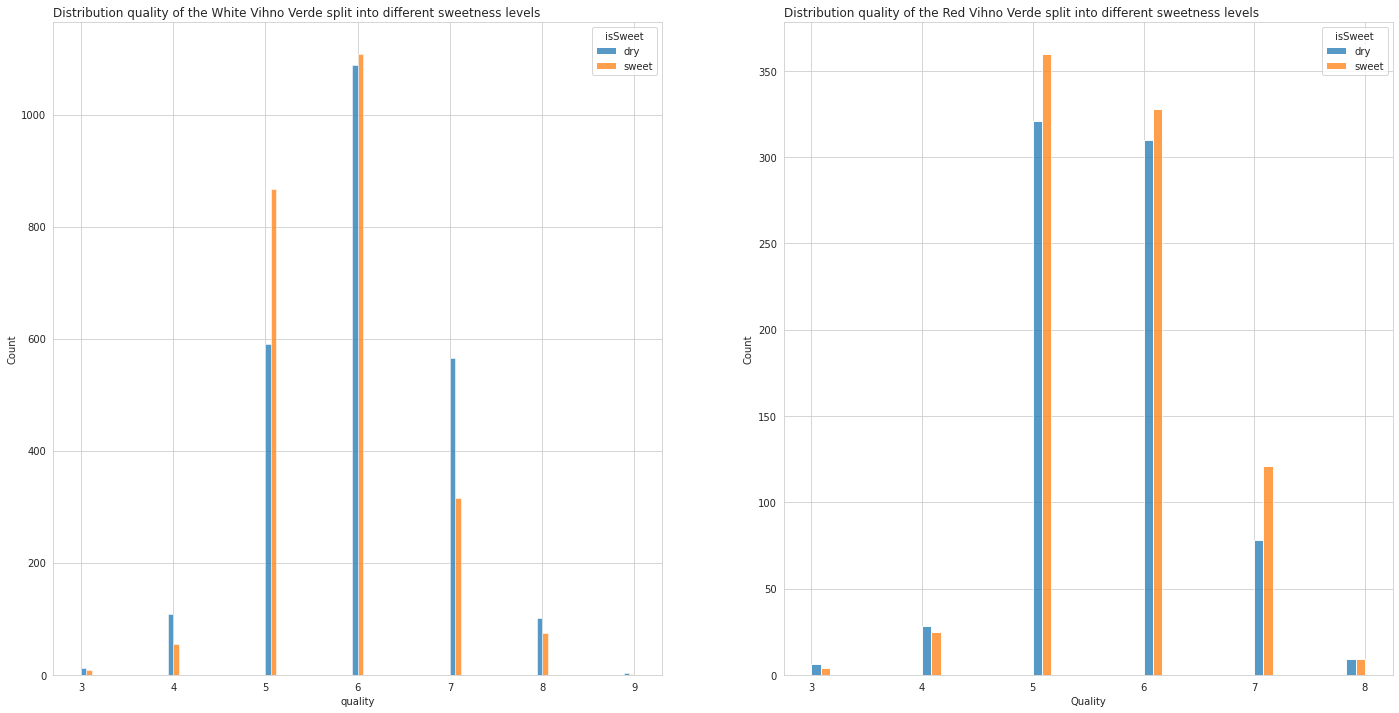

In [176]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Distribution quality of the White Vihno Verde split into different sweetness levels", loc='left') 
ax2.set_title("Distribution quality of the Red Vihno Verde split into different sweetness levels", loc='left') 

sns.histplot(data=white_vihno_dataset, x="quality", hue="isSweet", multiple="dodge", ax=ax1, hue_order=['dry', 'sweet'])
sns.histplot(data=red_vihno_dataset, x="quality", hue="isSweet", multiple="dodge", ax=ax2, hue_order=['dry', 'sweet'])

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

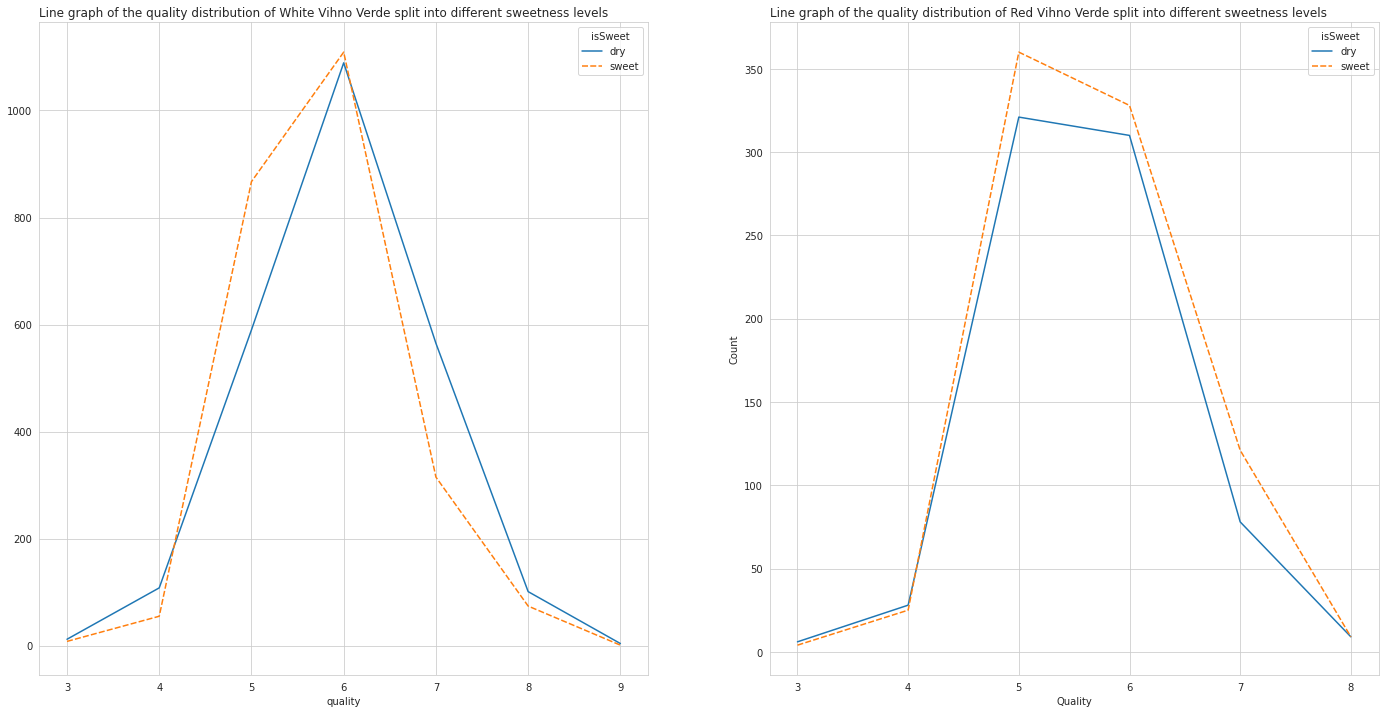

In [177]:
white_sub_dataset = white_vihno_dataset.pivot_table(index='quality', columns='isSweet', values='residual sugar', aggfunc='count')
red_sub_dataset = red_vihno_dataset.pivot_table(index='quality', columns='isSweet', values='residual sugar', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Line graph of the quality distribution of White Vihno Verde split into different sweetness levels", loc='left')
ax2.set_title("Line graph of the quality distribution of Red Vihno Verde split into different sweetness levels", loc='left')


sns.lineplot(data=white_sub_dataset, ax=ax1)
sns.lineplot(data=red_sub_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

In the Red Vihno Verde, there is no correlation to whether sweet red wines are rated higher than dry red wines.

In White Vihno Verde, this is a slight correlation with dry white wines being rated higher than sweet white wines. However, this is barely visible in the graphs, so can not be defined as a trate of the White Vihno Verde.

##Determining most useful variables for Models

In [178]:
display(red_vihno_dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mid,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,mid,sweet
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,mid,sweet
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,mid,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mid,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,mid,dry
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,mid,sweet
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,mid,sweet
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,mid,dry


**Broke down the variables into 3 catagories acidity, viscousity and sulfur content for easier comparability of the variables**

In [179]:
acidity = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH']
viscousity = ['residual sugar', 'alcohol', 'density']
sulfur = ['free sulfur dioxide' , 'total sulfur dioxide', 'sulphates']

**Correlation matrix for the acidity variables**

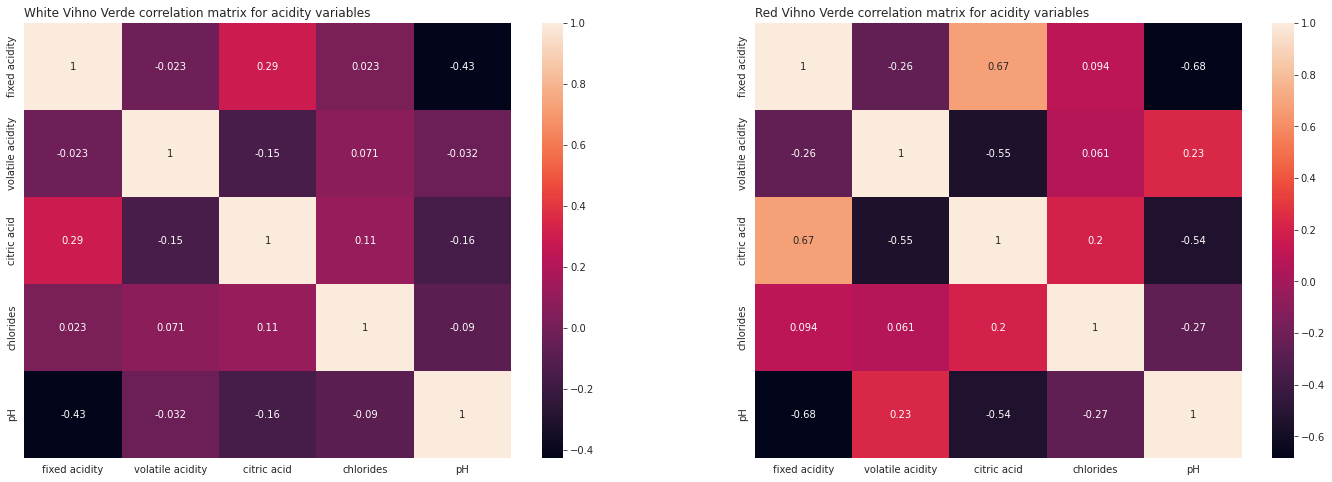

In [180]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=acidity)
red_df = pd.DataFrame(red_vihno_dataset, columns=acidity)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for acidity variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for acidity variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Moderate negative correlation between pH and fixed acidity
*   Slight positive correlation between citric acid and fixed acidity

**Red Vihno Verde**
*   Strong negative correlation between pH and fixed acidity
*   Strong positive correlation between citric acid and fixed acidity
*   Moderate positive correlation between citric acid and volatile acidity
*   Moderate negative correlation between pH and citric acid
*   Slight negative correlation between pH and chlorides
*   Slight negative correlation between fixed acidity and volatile acidity


**Correlation matrix for the Viscousity variables**

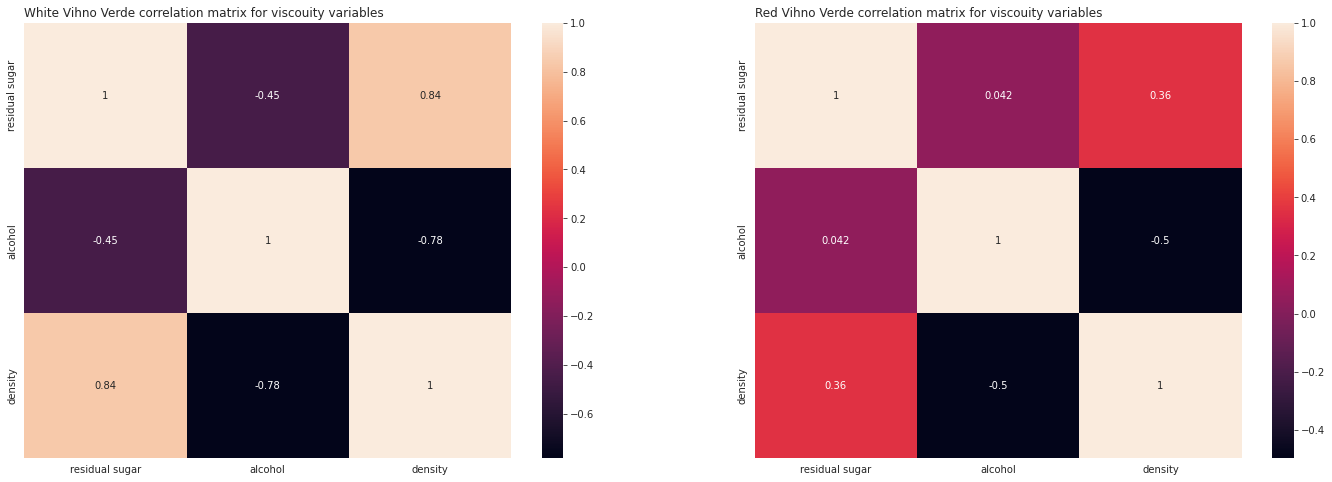

In [181]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=viscousity)
red_df = pd.DataFrame(red_vihno_dataset, columns=viscousity)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for viscouity variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for viscouity variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Strong positive correlation between density and residual sugar content
*   Strong negative correlation between alcohol and density
*   Moderate negaitve correlation between alcohol and residual sugar content

**Red Vihno Verde**
*   Slight positive correlation between density and residual sugar content
*   Moderate negative correlation between alcohol and density





**Correlation matrix for the sulfur variables**

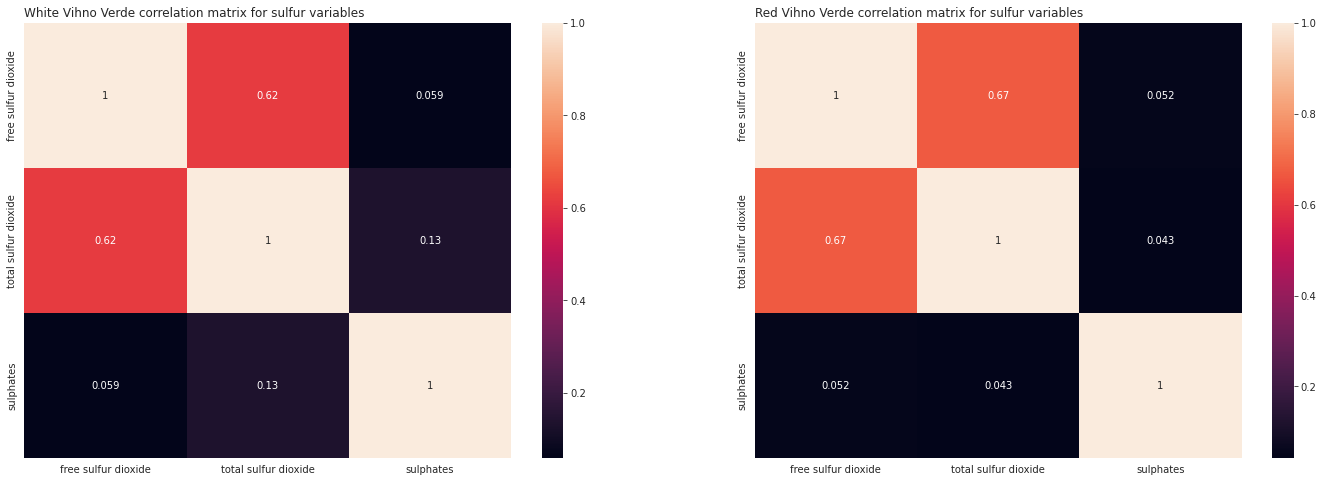

In [182]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=sulfur)
red_df = pd.DataFrame(red_vihno_dataset, columns=sulfur)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for sulfur variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for sulfur variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Moderate positive correlation betwwen total sulfur dixoide and free sulfur 
dioxide

**Red Vihno Verde**
*   Moderate positive correlation betwwen total sulfur dixoide and free sulfur dioxide



**Correlation matrix for the all variables compared to the quality variable**

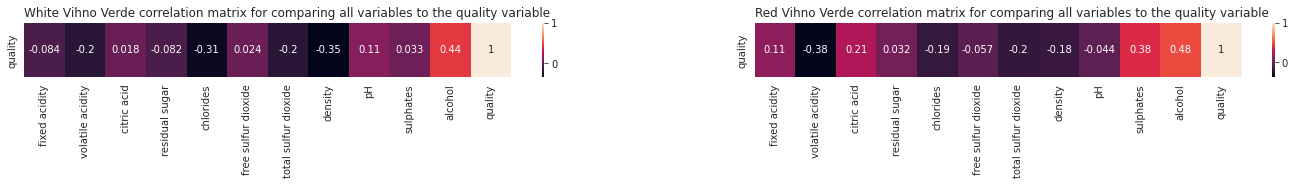

In [183]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 1), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
red_df = pd.DataFrame(red_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

white_corr_matrix = white_df.corr(method='spearman')
red_corr_matrix = red_df.corr(method='spearman')

sns.heatmap(white_corr_matrix.iloc[[11]], annot=True, ax=ax1)
sns.heatmap(red_corr_matrix.iloc[[11]], annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left')

plt.show()

**Main Variables when Compared to Quality**

*For White Vihno Verde:*
*   Alcohol
*   Density
*   Chlorides

*For Red Vihno Verde:*
*   Alcohol
*   Sulphates
*   Volatile acidity





**Correlation matrix for all variables**

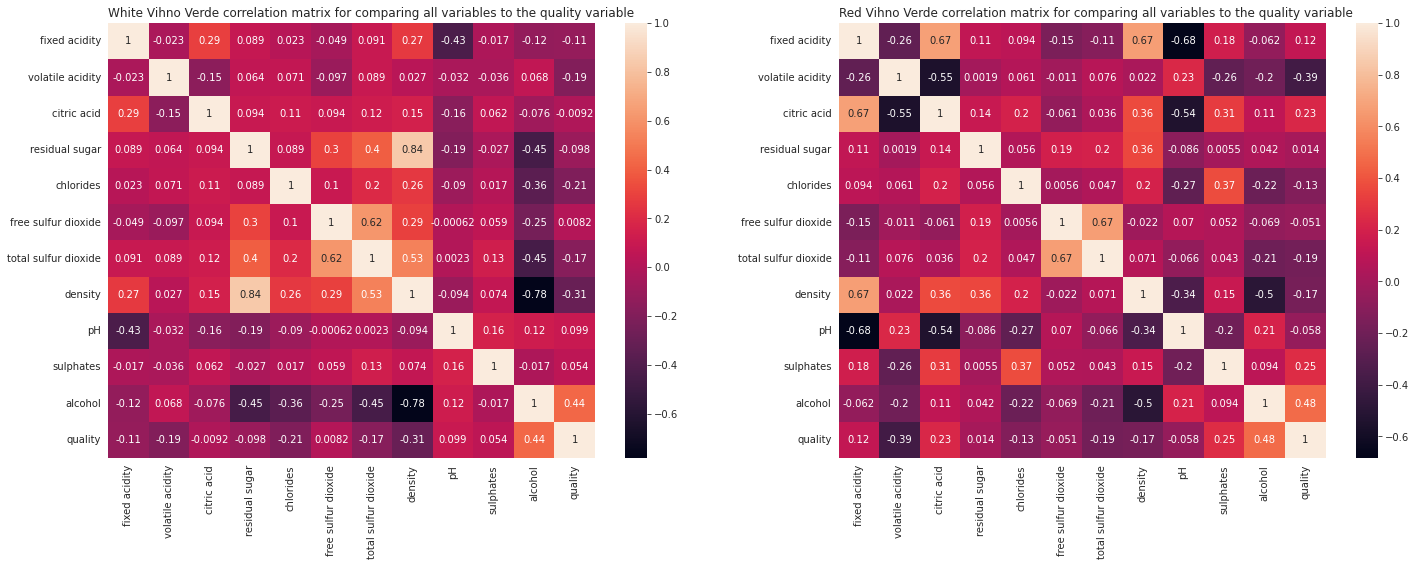

In [184]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
red_df = pd.DataFrame(red_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left')

plt.show()

**Overall: White Vihno Verde**

Variables for the machine learning:
*   Alcohol
*   Density
*   Chlorides
*   Residual Sugar
*   Total Sulphar Dioxide
*   Free Sulphar Dioxide


**Overall: Red Vihno Verde**

Variables for the machine learning:
*   Alcohol
*   Density
*   Volatile acidity
*   Fixed acidity
*   Citric Acid
*   Sulphates



##Training the Models: White Vihno Verde

**One hot encoding for the alcohol_cat and isSweet column from a categorical category to a numerical one to allow a classifier to train.**

In [185]:
# White Vihno Verde
dummies = pd.get_dummies(white_vihno_dataset['alcohol_cat'])
white_dataset_onehot = pd.concat((white_vihno_dataset, dummies), axis = 1)
white_dataset_onehot = white_dataset_onehot.drop('alcohol_cat', axis = 1)

dummies = pd.get_dummies(white_dataset_onehot["isSweet"])
white_dataset_onehot = pd.concat((white_dataset_onehot, dummies), axis = 1) # axis = 1 == columns (0 == rows)
white_dataset_onehot = white_dataset_onehot.drop("isSweet", axis = 1)


quailty_numeric = {range(0,8): 'low', range(8,10): 'high'}

numeric_quality_dataset = white_vihno_dataset.replace({'quality': quailty_numeric})
white_dataset_onehot = white_dataset_onehot.drop('quality', axis = 1)
white_dataset_onehot = pd.concat((white_dataset_onehot, numeric_quality_dataset['quality']), axis = 1)

**Splitting the data into a test and train set**

In [186]:
from sklearn.model_selection import train_test_split

data = white_dataset_onehot.drop(['quality'], axis = 1).values
labels = white_dataset_onehot['quality'].values

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.33, random_state = 10)

**Oversampling the datasets using SMOTE (Synthetic Minority Over-sampling Technique)**

In [187]:
from imblearn.over_sampling import SMOTE

data_train, labels_train = SMOTE(random_state=10).fit_resample(data_train, labels_train)

**Scaling the datasets**

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)

**Model: Non-linear SVM**

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = 1
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

non_linear_svm = SVC(C=C, kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

non_linear_svm.fit(data_train_scaled, labels_train)

non_linear_svm_predictions = non_linear_svm.predict(data_test_scaled)

train_non_linear_svm_predictions = non_linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_non_linear_svm_predictions)

test_non_linear_svm_predictions = non_linear_svm.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_non_linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 93.32096474953617%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 77.551%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 100%
*  Test acc: 81.880%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 93.321%

**Model: Decision Tree**

In [190]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(data_train_scaled, labels_train)

train_decision_tree_predictions = decision_tree.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_decision_tree_predictions)

test_decision_tree_predictions = decision_tree.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_decision_tree_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 93.25912183055041%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 78.108%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 100%
*  Test acc: 80.334%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 93.074%

**Model: Random Forest**

In [191]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest.fit(data_train_scaled, labels_train)

train_random_forest_predictions = random_forest.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_random_forest_predictions)

test_random_forest_predictions = random_forest.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_random_forest_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 96.53679653679653%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 83.612%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 99.981%
*  Test acc: 85.899%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 96.538%

## Evaluating the Models: White Vihno Verde

* Very High F1-Scores
* High AUC Numbers

This can happen, when the classifier is good at identifying the positive class but has a higher false positive rate or is less confident in its predictions. In such cases, it is important to carefully evaluate the classifier's performance and consider other metrics and domain knowledge before making any decisions.

###Non-linear SVM Model - Evaluation:

**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.

In [192]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_non_linear_svm_predictions, average='micro')

0.9332096474953617

0.93 is a very high f1 score, showing high harmonic mean of precision and recall

**ROC Curve**: illustrates how well the classifier is able to separate the 
positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [193]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_non_linear_svm_predictions = le.fit_transform(test_non_linear_svm_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_non_linear_svm_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0.         0.54166667 1.        ]
tpr: [0.         0.95533981 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative example

In [194]:
metrics.auc(fpr, tpr)

0.706836569579288

AUC of 0.7 means that the classifier is able to distinguish between positive and negative examples with a moderate level of accuracy




### Decision Tree - Evaluation:


**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.


In [195]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_decision_tree_predictions, average='micro')

0.9325912183055041

0.93 is a very high f1 score, showing high harmonic mean of precision and recall


**ROC Curve**: illustrates how well the classifier is able to separate the positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [196]:
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_decision_tree_predictions = le.fit_transform(test_decision_tree_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_decision_tree_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0.         0.51388889 1.        ]
tpr: [0.         0.95339806 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative examples


In [197]:
metrics.auc(fpr, tpr)

0.7197545846817692

AUC of 0.73 means that the classifier is able to distinguish between positive and negative examples with a reasonable level of accuracy

### Random Forest - Evaluation:

**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.


In [198]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_random_forest_predictions, average='micro')

0.9653679653679653

0.96 indicates the random forest model has almost perfect precision and recall.

**ROC Curve**: illustrates how well the classifier is able to separate the positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [199]:
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_random_forest_predictions = le.fit_transform(test_random_forest_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_random_forest_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0.         0.52777778 1.        ]
tpr: [0.         0.98834951 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative examples

In [200]:
metrics.auc(fpr, tpr)

0.7302858683926645

AUC of 0.73 is generally considered to be a good level of performance for a binary classifier

## Training the Models: Red Vihno Verde

**One hot encoding for the alcohol_cat and isSweet column from a categorical category to a numerical one to allow a classifier to train.**

In [201]:
#Red Vihno Verde
dummies = pd.get_dummies(red_vihno_dataset['alcohol_cat'])
red_dataset_onehot = pd.concat((red_vihno_dataset, dummies), axis = 1)
red_dataset_onehot = red_dataset_onehot.drop('alcohol_cat', axis = 1)

dummies = pd.get_dummies(red_dataset_onehot["isSweet"])
red_dataset_onehot = pd.concat((red_dataset_onehot, dummies), axis = 1) # axis = 1 == columns (0 == rows)
red_dataset_onehot = red_dataset_onehot.drop("isSweet", axis = 1)


quailty_numeric = {range(0,8): 'low', range(8,10): 'high'}

numeric_quality_dataset = red_vihno_dataset.replace({'quality': quailty_numeric})
red_dataset_onehot = red_dataset_onehot.drop('quality', axis = 1)
red_dataset_onehot = pd.concat((red_dataset_onehot, numeric_quality_dataset['quality']), axis = 1)

**Splitting the data into a test and train set**

In [202]:
data = red_dataset_onehot.drop(['quality'], axis = 1).values
labels = red_dataset_onehot['quality'].values

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.33, random_state = 10)

**Oversampling the datasets using SMOTE (Synthetic Minority Over-sampling Technique)**

In [203]:
data_train, labels_train = SMOTE(random_state=10).fit_resample(data_train, labels_train)

**Scaling the datasets**

In [204]:
scaler = StandardScaler().fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)

**Model: Non-linear SVM**

In [205]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = 1
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

non_linear_svm = SVC(C=C, kernel=kernel, random_state=random_state, degree=degree, coef0=coef0)

non_linear_svm.fit(data_train_scaled, labels_train)

non_linear_svm_predictions = non_linear_svm.predict(data_test_scaled)

train_non_linear_svm_predictions = non_linear_svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_non_linear_svm_predictions)

test_non_linear_svm_predictions = non_linear_svm.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_non_linear_svm_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 97.1590909090909%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 73.484%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 100%
*  Test acc: 87.500%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 97.159%

**Model: Decision Tree**

In [206]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(data_train_scaled, labels_train)

train_decision_tree_predictions = decision_tree.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_decision_tree_predictions)

test_decision_tree_predictions = decision_tree.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_decision_tree_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 97.53787878787878%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 73.674%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 100%
*  Test acc: 85.985%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 97.538%

**Model: Random Forest**

In [207]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest.fit(data_train_scaled, labels_train)

train_random_forest_predictions = random_forest.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, train_random_forest_predictions)

test_random_forest_predictions = random_forest.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, test_random_forest_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 100.0%
Test acc: 97.53787878787878%


Quality: Low = 5 -> 5 : High = 6 -> 9
*  Train acc: 100%
*  Test acc: 80.682%


Quality: Low = 5 -> 6 : High = 7 -> 9
*  Train acc: 100%
*  Test acc: 87.689%


Quality: Low = 5 -> 7 : High = 8 -> 9
*  Train acc: 100%
*  Test acc: 97.917%

## Evaluating the Models: Red Vihno Verde

* Very High F1-Scores
* Very Poor AUC numbers

This can happen, When the positive class is very rare and the classifier is very good at identifying it correctly (high precision and recall), but is not good at distinguishing between positive and negative examples overall (low AUC

###Non-linear SVM Model - Evaluation:

**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.

In [208]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_non_linear_svm_predictions, average='micro')

0.9715909090909091

F1 score of 0.97 is a very high score and indicates that the model is performing very well in terms of both precision and recall

**ROC Curve**: illustrates how well the classifier is able to separate the 
positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [209]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_non_linear_svm_predictions = le.fit_transform(test_non_linear_svm_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_non_linear_svm_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0. 1. 1.]
tpr: [0.         0.99226306 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative example

In [210]:
metrics.auc(fpr, tpr)

0.4961315280464217

AUC of 0.49 indicates that the model's ability to distinguish between positive and negative classes is almost as bad as random guessing



### Decision Tree - Evaluation:


**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.


In [211]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_decision_tree_predictions, average='micro')

0.9753787878787878

0.97 indicates that the model is correctly identifying the positive class (or classes) with high precision and high recall, meaning that it is making very few false positives and very few false negatives


**ROC Curve**: illustrates how well the classifier is able to separate the positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [212]:
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_decision_tree_predictions = le.fit_transform(test_decision_tree_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_decision_tree_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0.         0.90909091 1.        ]
tpr: [0.         0.99419729 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative examples


In [213]:
metrics.auc(fpr, tpr)

0.5425531914893618

AUC of 0.54 means that the model is not performing any better than random guessing, and its predictions are not reliable

### Random Forest - Evaluation:

**F1 Score:** takes into account both the precision and recall ability of the model, making it a well rounded assessor of model performance.


In [214]:
from sklearn.metrics import f1_score

f1_score(labels_test, test_random_forest_predictions, average='micro')

0.9753787878787878

0.971 indicates that the model is correctly identifying the positive class (or classes) with high precision and high recall

**ROC Curve**: illustrates how well the classifier is able to separate the positive and negative examples, and the shape of the curve provides additional information about the performance of the classifier

In [215]:
numeric_labels_test = le.fit_transform(labels_test)
numeric_test_random_forest_predictions = le.fit_transform(test_random_forest_predictions)

fpr, tpr, thresholds = metrics.roc_curve(numeric_labels_test, numeric_test_random_forest_predictions)

print("fpr:", fpr)
print("tpr:", tpr)
print("threshold:", thresholds)

fpr: [0. 1. 1.]
tpr: [0.         0.99613153 1.        ]
threshold: [2 1 0]


**AUC (Area Under the Curve)**: indicates how well a classifier is able to distinguish between positive and negative examples

In [216]:
metrics.auc(fpr, tpr)

0.49806576402321084

AUC of 0.498 indicates that the model's performance is very close to random guessing, and it is not able to distinguish between the positive and negative classes effectively

## Extension - Additional Descriptive Analysis

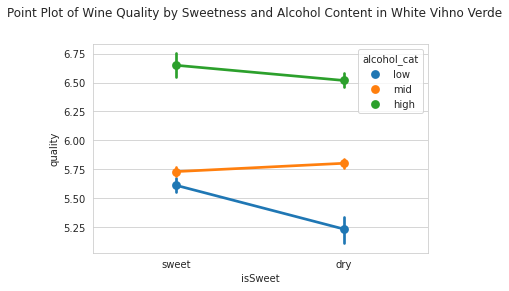

In [217]:
sns.set_style("whitegrid")
sns.pointplot(x="isSweet", y="quality", hue="alcohol_cat", data=white_vihno_dataset, hue_order=['low', 'mid', 'high'])
plt.subplots_adjust(top=0.85)
plt.suptitle("Point Plot of Wine Quality by Sweetness and Alcohol Content in White Vihno Verde")
plt.show()

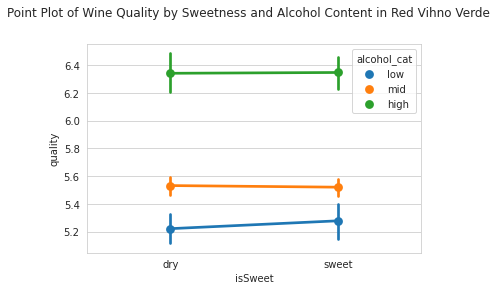

In [218]:
sns.set_style("whitegrid")
sns.pointplot(x="isSweet", y="quality", hue="alcohol_cat", data=red_vihno_dataset, hue_order=['low', 'mid', 'high'])
plt.subplots_adjust(top=0.85)
plt.suptitle("Point Plot of Wine Quality by Sweetness and Alcohol Content in Red Vihno Verde")
plt.show()

Combine the datasets together 

In [219]:
combined_data = pd.concat([white_vihno_dataset, red_vihno_dataset])

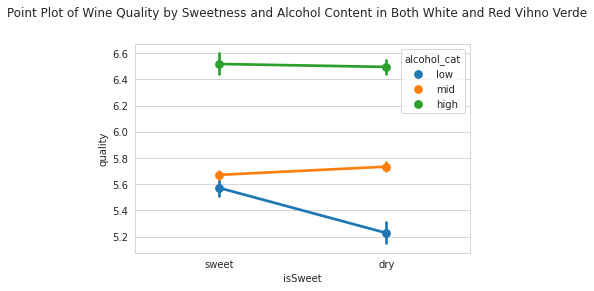

In [220]:
sns.set_style("whitegrid")
sns.pointplot(x="isSweet", y="quality", hue="alcohol_cat", data=combined_data, hue_order=['low', 'mid', 'high'])
plt.subplots_adjust(top=0.85)
plt.suptitle("Point Plot of Wine Quality by Sweetness and Alcohol Content in Both White and Red Vihno Verde")
plt.show()